In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.axes_style('whitegrid')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [ ]:
from scipy.io import loadmat

def read_HSI():
    X = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
    y = loadmat('Indian_pines_gt.mat')['indian_pines_gt']
    print(f"X shape: {X.shape}\ny shape: {y.shape}")
    return X, y

X, y = read_HSI()


X shape: (145, 145, 200)
y shape: (145, 145)


(145, 145, 200)


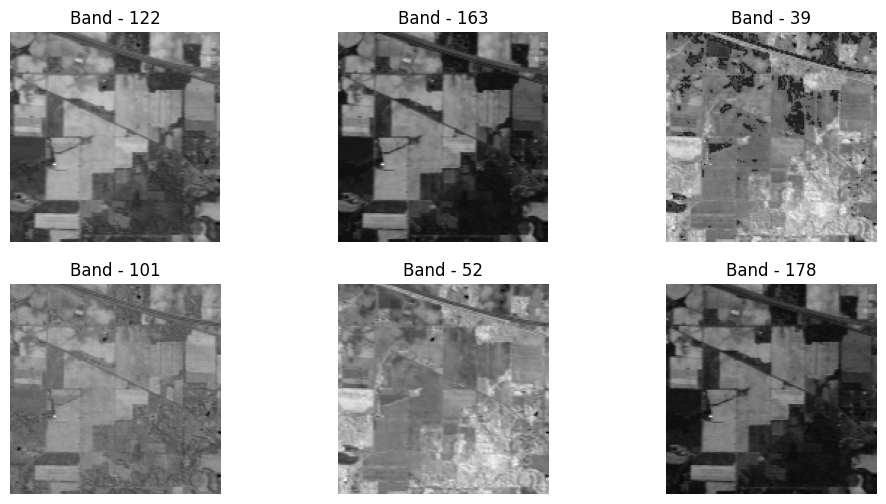

In [ ]:
fig = plt.figure(figsize=(12, 6))
print(X.shape)
for i in range(1, 1 + 6):
    fig.add_subplot(2, 3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:, :, q], cmap='gray')
    plt.axis('off')
    plt.title(f'Band - {q}')

plt.savefig('IP_Bands.png')


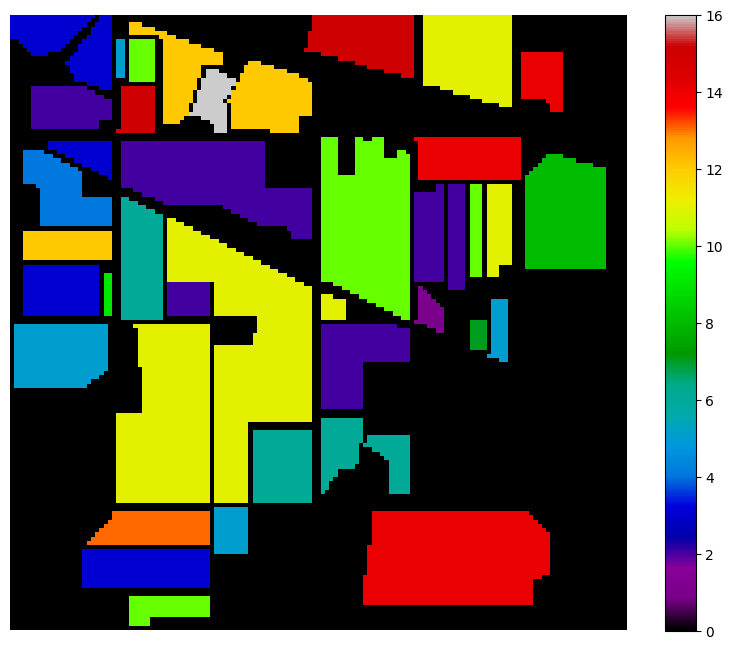

In [ ]:
plt.figure(figsize = (10, 8))
plt.imshow(y, cmap = 'nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_GT.png')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

def extract_pixels(X,y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis = 1)
  df.columns = [f'bans{i}' for i in range(1, 1+X.shape[2])] + ['class']
  df.to_csv('Dataset.csv')
  return df

df = extract_pixels(X,y)

In [ ]:
df.head()

,bans1,bans2,bans3,bans4,bans5,bans6,bans7,bans8,bans9,bans10,...,bans192,bans193,bans194,bans195,bans196,bans197,bans198,bans199,bans200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21025 entries, 0 to 21024
Columns: 201 entries, bans1 to class
dtypes: uint16(200), uint8(1)
memory usage: 8.0 MB


In [ ]:
df.iloc[:, :-1].describe()

,bans1,bans2,bans3,bans4,bans5,bans6,bans7,bans8,bans9,bans10,...,bans191,bans192,bans193,bans194,bans195,bans196,bans197,bans198,bans199,bans200
count,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,...,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000
mean,2957.363472,4091.321237,4277.502259,4169.956671,4516.678668,4790.595149,4848.317574,4714.732509,4668.904828,4439.065541,...,1079.310773,1061.927848,1060.210273,1063.276813,1050.048514,1040.201141,1043.370321,1030.194816,1015.571463,1008.513579
std,354.918708,230.390005,257.827640,280.761254,346.035984,414.382138,469.247667,491.728349,533.232855,539.908195,...,49.943791,38.843805,38.712195,41.920969,34.242725,26.452672,29.794418,20.865106,11.386402,7.050921
min,2560.000000,2709.000000,3649.000000,2810.000000,3840.000000,4056.000000,4004.000000,3865.000000,3775.000000,2792.000000,...,998.000000,998.000000,999.000000,999.000000,993.000000,990.000000,992.000000,989.000000,986.000000,981.000000
25%,2602.000000,3889.000000,4066.000000,3954.000000,4214.000000,4425.000000,4421.000000,4263.000000,4173.000000,3940.000000,...,1031.000000,1026.000000,1024.000000,1024.000000,1019.000000,1016.000000,1016.000000,1012.000000,1006.000000,1004.000000
50%,2780.000000,4106.000000,4237.000000,4126.000000,4478.000000,4754.000000,4808.000000,4666.000000,4632.000000,4404.000000,...,1068.000000,1053.000000,1052.000000,1054.000000,1043.000000,1033.000000,1035.000000,1026.000000,1014.000000,1009.000000
75%,3179.000000,4247.000000,4479.000000,4350.000000,4772.000000,5093.000000,5198.000000,5100.000000,5084.000000,4860.000000,...,1129.000000,1099.000000,1098.000000,1104.000000,1083.000000,1066.000000,1072.000000,1050.000000,1024.000000,1014.000000
max,4536.000000,5744.000000,6361.000000,6362.000000,7153.000000,7980.000000,8284.000000,8128.000000,8194.000000,7928.000000,...,1364.000000,1287.000000,1289.000000,1315.000000,1258.000000,1201.000000,1245.000000,1167.000000,1076.000000,1036.000000


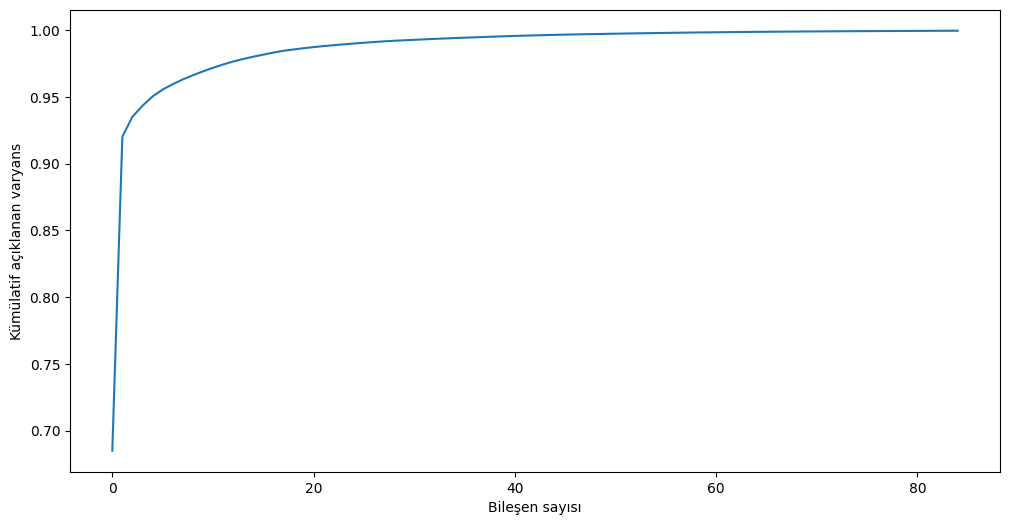

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 85)

principalComponents = pca.fit_transform(df.iloc[:, :-1].values)

ev = pca.explained_variance_ratio_

plt.figure(figsize = (12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Bileşen sayısı')
plt.ylabel('Kümülatif açıklanan varyans')

plt.show()

In [ ]:
pca = PCA(n_components = 40)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,41)] + ['class']

In [ ]:
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-32,PC-33,PC-34,PC-35,PC-36,PC-37,PC-38,PC-39,PC-40,class
0,5014.905985,1456.863260,72.697049,71.204925,-435.686978,-68.840342,134.809804,-304.372356,256.432769,-66.631110,...,18.999591,-2.179528,18.463246,-17.975221,-30.321080,21.042857,-0.865022,65.087756,9.570885,3
1,5601.383743,-2023.450087,350.134661,-528.465054,148.088295,-288.359030,202.956824,240.848066,-474.857861,93.493934,...,98.861656,-81.108113,-50.532560,30.535006,12.913198,-24.091737,1.786757,15.204297,40.551267,3
2,5796.135442,-3090.394852,490.539929,-760.214349,259.933313,-131.611216,172.927253,205.911214,572.491816,-191.622215,...,34.824461,-36.549131,-16.332259,21.155942,36.139493,-20.556728,19.802842,-33.839294,88.237512,3
3,5586.204575,-2369.376085,356.274720,-502.687157,146.554955,-306.679334,251.071076,234.966438,-314.023269,54.962232,...,128.084291,-64.666063,33.408513,20.755577,66.261562,-11.295938,49.234684,2.979783,59.308314,3
4,5020.990792,339.603390,-23.007525,-92.556769,-368.495440,-438.266726,502.715385,-345.536540,-188.352839,-67.506123,...,-83.664535,72.645574,181.479220,-9.194979,-15.725389,-12.989806,-1.312636,64.162932,15.113752,3


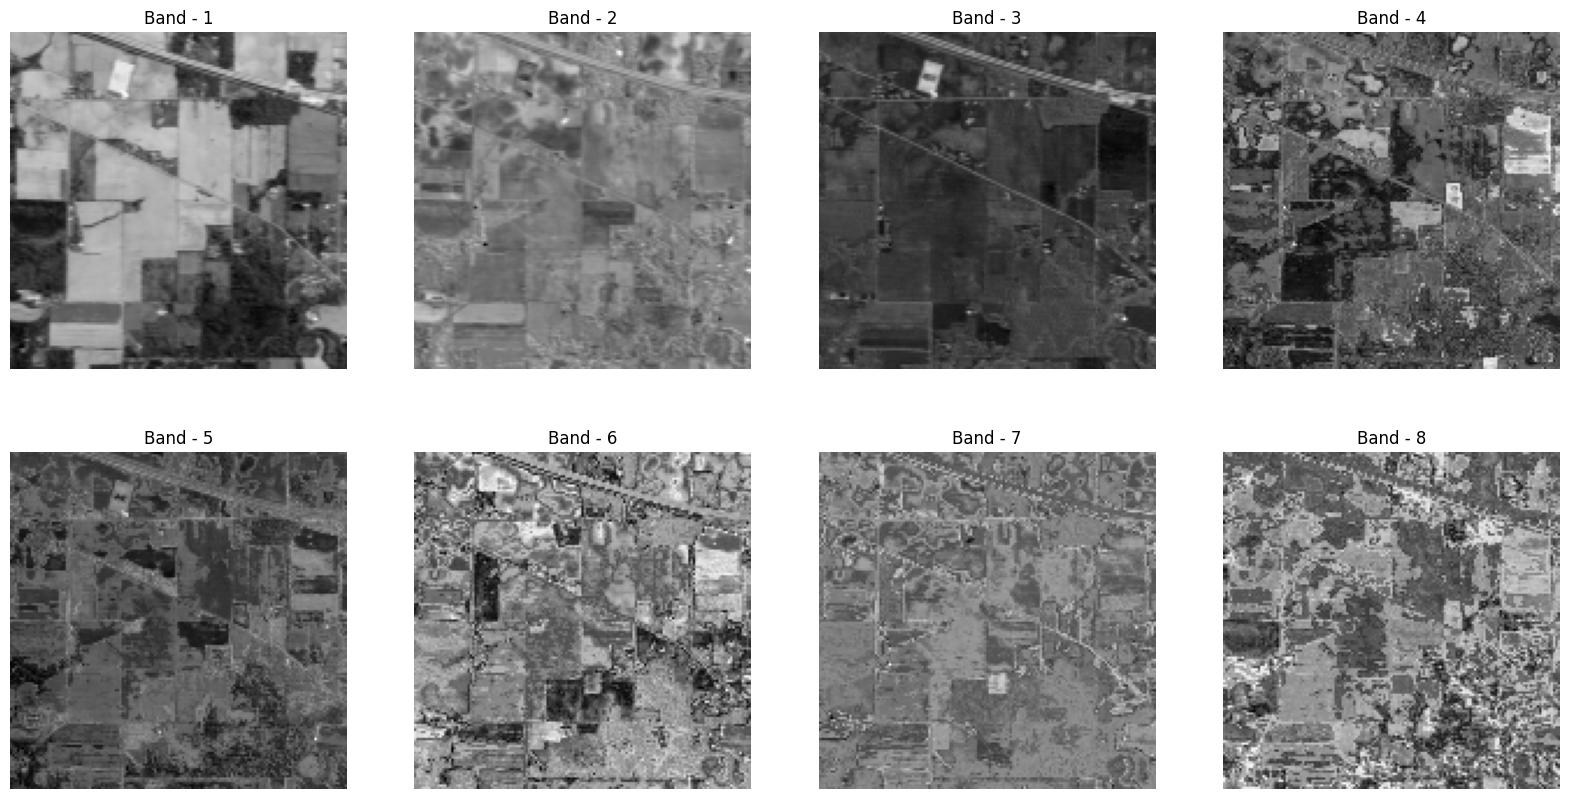

In [ ]:
fig = plt.figure(figsize = (20,10))

for i in range(1, 1+8):
  fig.add_subplot(2,4, i)
  plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(145,145), cmap = 'gray')
  plt.axis('off')
  plt.title(f'Band - {i}')

plt.savefig('IP_PCA_Bands.png')

In [ ]:
q.to_csv('IP_40_PCA.csv', index = False)

In [ ]:
x = q[q['class'] != 0]

X = x.iloc[:, :-1].values

y = x.loc[:, 'class'].values

names = ['Alfalfa', 'Corn-notill', 'Corn-mintill', 'Corn', 'Grass-pasture', 'Grass-trees', 'Grass-pasture-mowed',
         'Hay-windrowed', 'Oats', 'Soybean-notill', 'Soybean-minitill', 'Soybean-clean', 'Wheat', 'Woods',
         'Buildings Grass Trees Drives', 'Stone Steel Towers']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.30, random_state = 11)

svm = SVC(C = 150, kernel = 'rbf', cache_size = 10*1024)

svm.fit(X_train, y_train)

ypred = svm.predict(X_test)

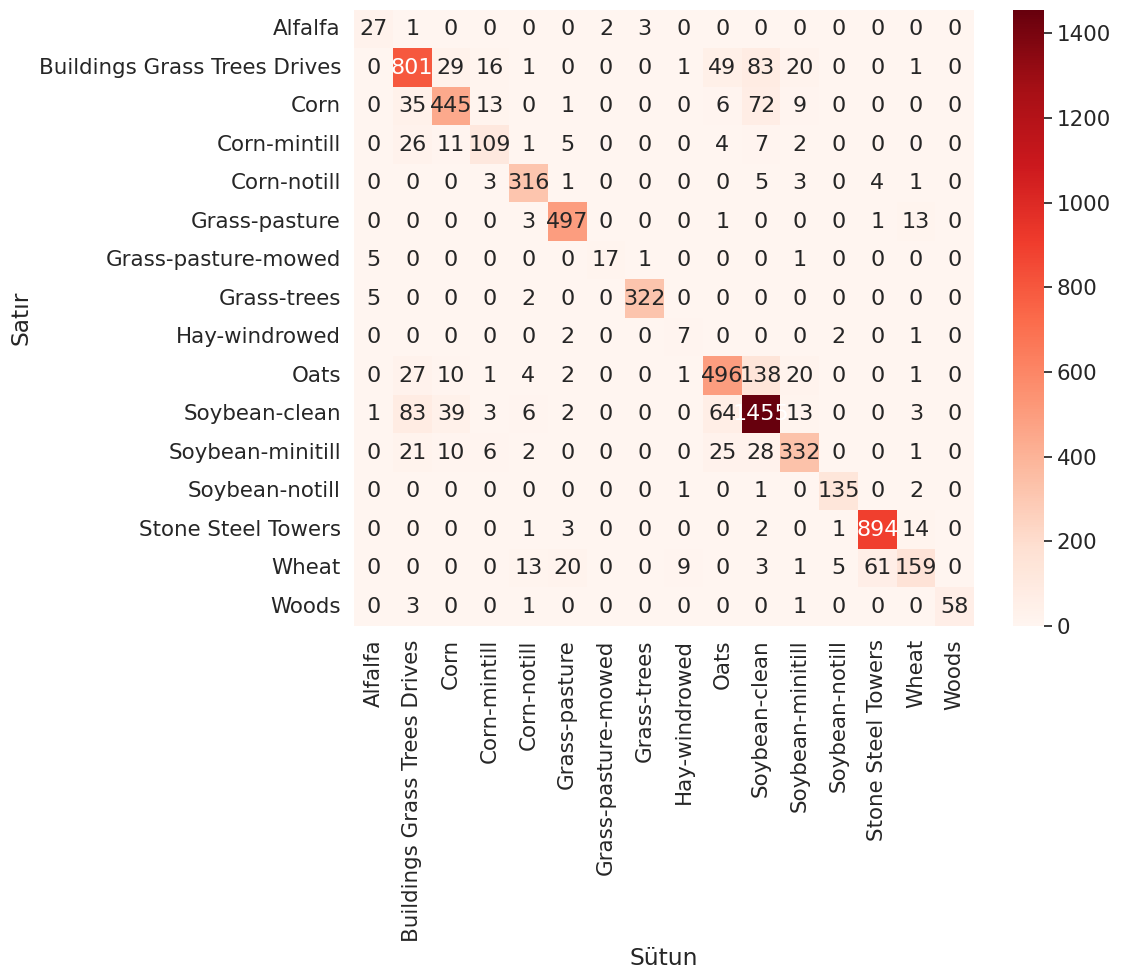

In [ ]:
import seaborn as sn
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns = np.unique(names), index = np.unique(names))
df_cm.index.name = 'Satır'
df_cm.columns.name = 'Sütun'
plt.figure(figsize = (10, 8))
sn.set(font_scale = 1.4) #for label size
sn.heatmap(df_cm, cmap = "Reds", annot = True, annot_kws = {"size" : 16}, fmt = 'd')
plt.savefig('cmap.png', dpi = 300)

In [ ]:
print(classification_report(y_test, ypred, target_names = names))

                              precision    recall  f1-score   support

                     Alfalfa       0.71      0.82      0.76        33
                 Corn-notill       0.80      0.80      0.80      1001
                Corn-mintill       0.82      0.77      0.79       581
                        Corn       0.72      0.66      0.69       165
               Grass-pasture       0.90      0.95      0.93       333
                 Grass-trees       0.93      0.97      0.95       515
         Grass-pasture-mowed       0.89      0.71      0.79        24
               Hay-windrowed       0.99      0.98      0.98       329
                        Oats       0.37      0.58      0.45        12
              Soybean-notill       0.77      0.71      0.74       700
            Soybean-minitill       0.81      0.87      0.84      1669
               Soybean-clean       0.83      0.78      0.80       425
                       Wheat       0.94      0.97      0.96       139
                   

In [ ]:
l = []
for i in range(q.shape[0]):
  if q.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(svm.predict(q.iloc[i, :-1].values.reshape(1, -1)))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


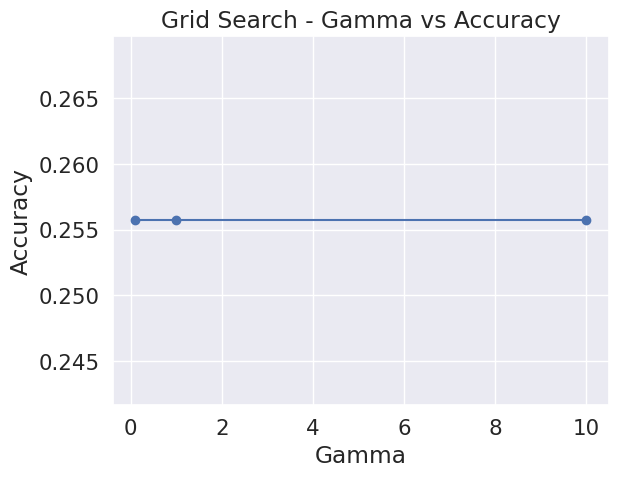

In [ ]:

# SVC sınıflandırıcısını oluşturun
classifier = SVC()

# Grid Search için sigma değerlerini belirleyin
param_grid = {'gamma': [0.1, 1, 10]}

# Grid Search ile en iyi sigma değerini bulun
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)

# En iyi sigma değerini ve buna karşılık gelen doğruluk skorunu alın
best_gamma = grid_search.best_params_['gamma']
best_accuracy = grid_search.best_score_

# En iyi sigma değerini kullanarak modeli yeniden eğitin
best_classifier = SVC(gamma=best_gamma)
best_classifier.fit(X_train, y_train)

import matplotlib.pyplot as plt

# Grid Search sonuçlarını alın
results = grid_search.cv_results_

# Gamma değerlerini ve buna karşılık gelen doğruluk skorlarını alın
gammas = results['param_gamma'].data
accuracies = results['mean_test_score']

# Gamma değerlerini görsel olarak gösterin
plt.plot(gammas, accuracies, marker='o')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('Grid Search - Gamma vs Accuracy')
plt.grid(True)
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 65.26 %
Standard Deviation: 1.42 %


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

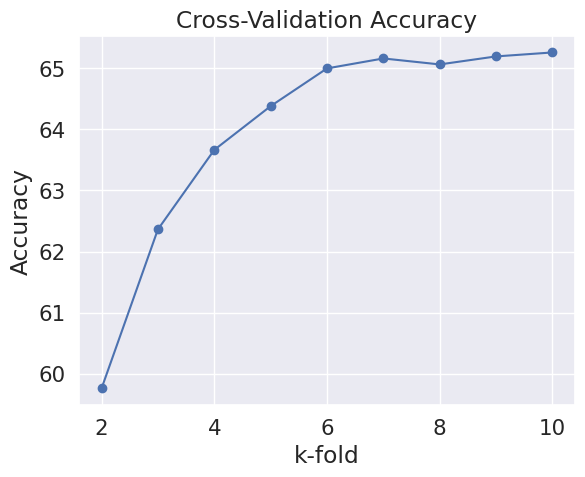

In [ ]:
# SVC sınıflandırıcısını oluştururken gamma parametresini kullanarak sigma değerini ayarlayın
classifier = SVC()  # Sigma değerini burada belirleyebilirsiniz

# Çapraz doğrulama ile doğruluk skorunu hesaplayın
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

# Doğruluk skoru ve standart sapmayı yazdırın
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

import matplotlib.pyplot as plt

# K-fold değerlerini belirleyin
k_values = range(2, 11)  # Örnek olarak 2'den 10'a kadar k-fold değerleri

# Boş bir liste oluşturun
mean_accuracies = []

# Her bir k-fold değeri için çapraz doğrulama yapın ve doğruluk skorlarını kaydedin
for k in k_values:
    classifier = SVC(gamma='scale')  # Sigma değerini burada belirleyebilirsiniz
    accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=k)
    mean_accuracies.append(accuracies.mean() * 100)

# Çizgi grafiği oluşturun
plt.plot(k_values, mean_accuracies, marker='o')
plt.xlabel('k-fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy')
plt.grid(True)
plt.show()



<ipython-input-20-8f92a2ec9fc0>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clmap = np.array(l).reshape(145,145).astype('float')


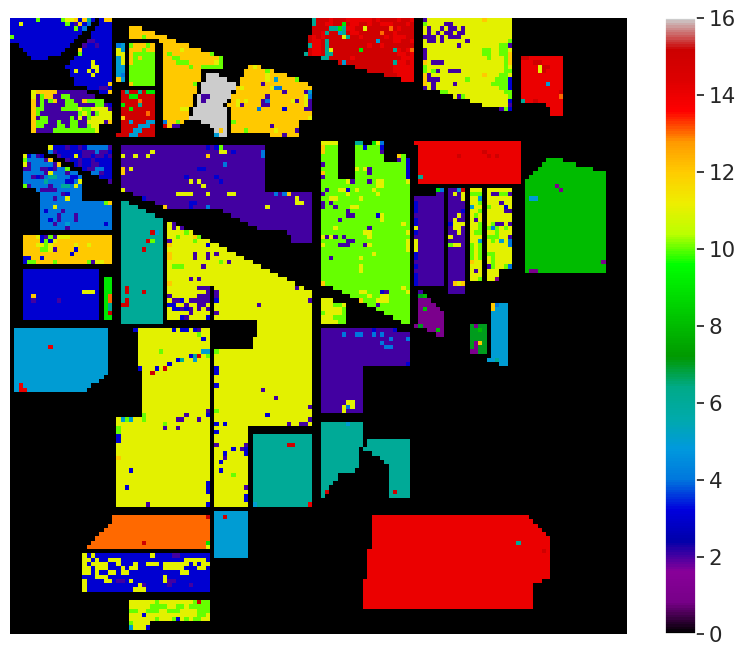

In [ ]:
clmap = np.array(l).reshape(145,145).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_cmap.png')
plt.show()
